This notebook contains my attempts at trying to do a cluster type analysis to see if overall the individual calls recorded in single vs multi bat audio clips are different or not. It's been sometime since I've done this kind of analysis and so I'm now wondering how to go about it. Here are a list of options:

* Binomial logistic regression:

    We have calls recorded under two conditions, single and multi bat. This is represented as a 1/0 outcome, and 
    with the logistic regression, we'll try to see if we can succesfully classify the categories just based on the 
    measured parameters. If succesful (75% or so perhaps), then we can see which parameters help in distinguishing the two classes by seeing the coefficients. 

* Dendrogram

* Decision-trees




In [2]:
%matplotlib notebook

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [4]:
# Load the one-call-per-row dataset
df = pd.read_csv('../one_call_per_row_2020-07-10.csv')

In [5]:
df

,Unnamed: 0,ifm_terminal_frequency,ifm_peak_amplitude,ifm_region_id,ifm_stop,ifm_duration,ifm_rms,ifm_peak_frequency,ifm_start,ifm_peak_freq_resolution,...,duration,peak_freq_resolution,ifm-cf_dbratio,tfm-cf_dbratio,ifm-peak_db,tfm-peak_db,tfm_dbrms,ifm_dbrms,cf_dbrms,cf-peak_db
0,0,93830.334190,0.259338,fm1,0.001556,0.001556,0.125976,103470.437018,0.000000,1282.051282,...,NaN,NaN,-2.728592,-8.944769,-11.722664,-19.137227,-24.210411,-17.994234,-15.265642,-7.820871
1,1,102803.738318,0.019897,fm1,0.002048,0.000428,0.009964,107476.635514,0.001620,4629.629630,...,NaN,NaN,-17.153700,-8.104120,-34.024047,-24.375695,-30.981963,-40.031544,-22.877843,-16.902226
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-4.509058,NaN,-27.361657,-36.384210,NaN,-31.875153,-25.664328
3,3,95756.880734,0.263123,fm1,0.002412,0.001744,0.149708,103211.009174,0.000668,1141.552511,...,NaN,NaN,-5.089907,-3.693966,-11.596838,-10.423536,-15.099166,-16.495107,-11.405201,-7.085234
4,4,99856.321839,0.043701,fm1,0.002440,0.001392,0.016833,104885.057471,0.001048,1428.571429,...,NaN,NaN,-6.331958,-8.414054,-27.190138,-30.413860,-37.558917,-35.476821,-29.144863,-22.965609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,352,85294.117647,0.008911,fm1,0.000448,0.000340,0.004141,102941.176471,0.000108,5813.953488,...,NaN,NaN,-9.188429,-0.942769,-41.001342,-31.042688,-39.412485,-47.658144,-38.469716,-29.745710
351,353,86580.086580,0.036652,fm1,0.002216,0.001848,0.017552,89826.839827,0.000368,1077.586207,...,NaN,NaN,-5.543741,1.382342,-28.718139,-21.500263,-28.187474,-35.113558,-29.569817,-24.279717
352,354,93342.036554,0.027985,fm1,0.001984,0.001532,0.016604,95953.002611,0.000452,1302.083333,...,NaN,NaN,-9.195373,1.085340,-31.061612,-18.963765,-25.315148,-35.595860,-26.400488,-21.384471
353,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.966785,NaN,-27.004112,-33.618774,NaN,-32.651990,-27.728098


In [60]:
df.columns

Index(['Unnamed: 0', 'ifm_terminal_frequency', 'ifm_peak_amplitude',
       'ifm_region_id', 'ifm_stop', 'ifm_duration', 'ifm_rms',
       'ifm_peak_frequency', 'ifm_start', 'ifm_peak_freq_resolution',
       'cf_terminal_frequency', 'cf_peak_amplitude', 'cf_region_id', 'cf_stop',
       'cf_duration', 'cf_rms', 'cf_peak_frequency', 'cf_start',
       'cf_peak_freq_resolution', 'tfm_terminal_frequency',
       'tfm_peak_amplitude', 'tfm_region_id', 'tfm_stop', 'tfm_duration',
       'tfm_rms', 'tfm_peak_frequency', 'tfm_start',
       'tfm_peak_freq_resolution', 'audio_file',
       'terminal_frequency_threshold', 'video_annot_id', 'num_bats', '0',
       'duration', 'peak_freq_resolution', 'ifm-cf_dbratio', 'tfm-cf_dbratio',
       'ifm-peak_db', 'tfm-peak_db', 'tfm_dbrms', 'ifm_dbrms', 'cf_dbrms',
       'cf-peak_db', 'bat_context'],
      dtype='object')

### How many single and multi bats do we have?

<IPython.core.display.Javascript object>


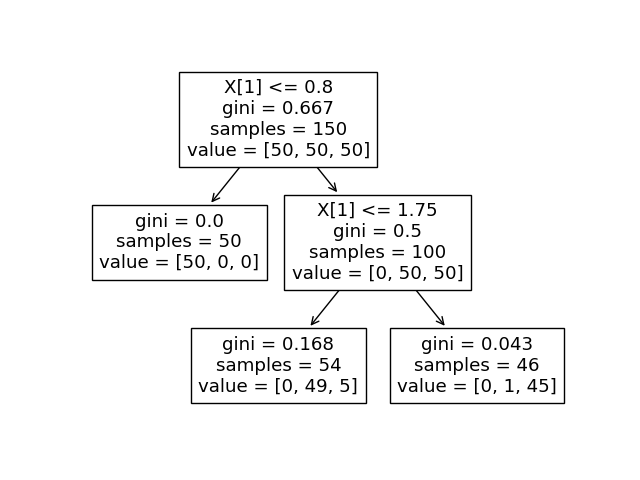

In [15]:
plt.figure()
plt.hist(df['num_bats'], bins=[1,2,3]);

As we can see we have about twice as many single bat calls as we do multi bat calls. I'm also going to create a 'bat_context' column which will convert the bat numbers into the bat context.

In [111]:
def convert_to_bat_context(X):
    if X == 1:
        return 'single'
    elif X>1:
        return 'multi'
    else:
        raise ValueError('X is neither 1 nor >1, please check its value')

df['bat_context'] = df['num_bats'].apply(convert_to_bat_context)

### Decision trees

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

In [113]:
iris = load_iris()

features = ['ifm_duration','tfm_duration','cf_duration']

training_dataset = pd.concat([df.loc[:,features],df['bat_context']],axis=1).reset_index(drop=True)
training_dataset = training_dataset.dropna()

x = training_dataset.loc[:,features].to_numpy()
y = training_dataset['bat_context'].to_numpy()

In [114]:
tree_clf = DecisionTreeClassifier(max_depth=3)
fitted = tree_clf.fit(x,y)

<IPython.core.display.Javascript object>


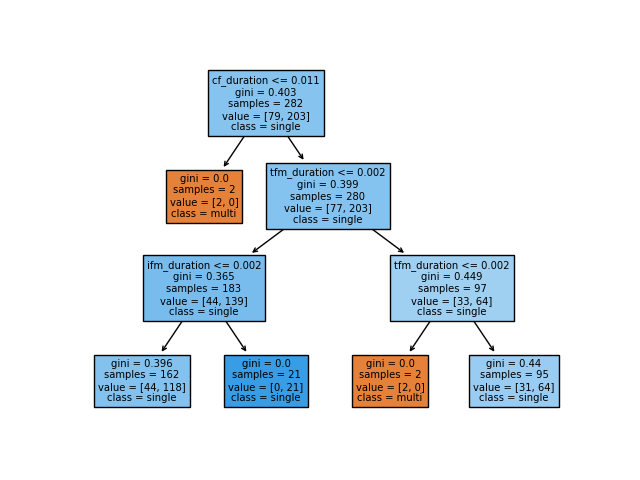

[Text(186.0, 323.4, 'cf_duration <= 0.011\ngini = 0.403\nsamples = 282\nvalue = [79, 203]\nclass = single'),
 Text(124.0, 230.99999999999997, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = multi'),
 Text(248.0, 230.99999999999997, 'tfm_duration <= 0.002\ngini = 0.399\nsamples = 280\nvalue = [77, 203]\nclass = single'),
 Text(124.0, 138.6, 'ifm_duration <= 0.002\ngini = 0.365\nsamples = 183\nvalue = [44, 139]\nclass = single'),
 Text(62.0, 46.19999999999999, 'gini = 0.396\nsamples = 162\nvalue = [44, 118]\nclass = single'),
 Text(186.0, 46.19999999999999, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]\nclass = single'),
 Text(372.0, 138.6, 'tfm_duration <= 0.002\ngini = 0.449\nsamples = 97\nvalue = [33, 64]\nclass = single'),
 Text(310.0, 46.19999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = multi'),
 Text(434.0, 46.19999999999999, 'gini = 0.44\nsamples = 95\nvalue = [31, 64]\nclass = single')]

In [117]:
plt.figure()
plot_tree(tree_clf,
         feature_names = features, 
         class_names= ['multi','single'],
         filled = True)